In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import pandas
import corner

params = {'axes.labelsize': 18,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 18,
          'axes.linewidth': 1,
          'legend.fontsize': 15,
          'xtick.labelsize': 18,
          'xtick.top': True,
          'ytick.labelsize': 18,
          'ytick.right': True,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'axes.formatter.limits' : (-3,3)}

mpl.rcParams.update(params)


In [2]:
data = pandas.read_csv("/home/aditya/GW150914_samples.dat")
data

,chirp_mass,mass_ratio,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,theta_jn,psi,luminosity_distance,geocent_time,log_likelihood,mass_1,mass_2,ra,dec,phase
0,30.267116,0.763539,0.183722,0.348187,0.815037,2.731744,2.365498,3.187590,2.942819,1.631139,387.026170,1.126259e+09,324.402336,39.861098,30.435512,1.024722,-1.106076,0.889062
1,30.339107,0.651025,0.807359,0.412809,1.509219,2.483971,5.891224,5.833265,2.777207,0.053264,573.161073,1.126259e+09,323.777255,43.390538,28.248311,2.537586,-1.079906,3.989707
2,30.777624,0.864400,0.007427,0.498642,1.158258,1.821592,1.007523,0.436112,2.646620,0.362810,474.412936,1.126259e+09,322.305329,38.046434,32.887351,1.802482,-1.258661,0.596350
3,30.764329,0.945468,0.102224,0.292767,1.521963,2.033638,6.147011,1.206613,2.647931,1.042118,428.187733,1.126259e+09,323.408899,36.346623,34.364585,1.475578,-1.266606,4.149266
4,29.492126,0.819580,0.647232,0.218865,1.675047,2.414857,1.479007,1.144547,2.668022,0.109333,509.536095,1.126259e+09,324.735929,37.458086,30.699887,2.380472,-1.176208,3.342165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,31.099223,0.846320,0.710133,0.338661,1.475460,2.121323,5.058327,0.321206,2.702441,1.715082,499.000950,1.126259e+09,324.762798,38.858874,32.887036,1.892327,-1.277318,2.117060
29996,29.000784,0.738925,0.376762,0.327202,1.878237,2.506038,2.673658,2.278894,2.638786,1.217604,465.811849,1.126259e+09,321.740654,38.842381,28.701588,2.162978,-1.278890,4.376578
29997,32.353383,0.902064,0.325823,0.039186,1.132142,0.568092,0.380388,6.049194,2.305046,2.655036,321.054208,1.126259e+09,317.625573,39.140139,35.306903,1.117803,-1.106854,2.525212
29998,30.909419,0.959256,0.405490,0.317085,1.120810,2.952710,4.827808,0.578162,2.363276,0.928071,377.776365,1.126259e+09,321.712258,36.253376,34.776253,1.712290,-1.259623,1.260755


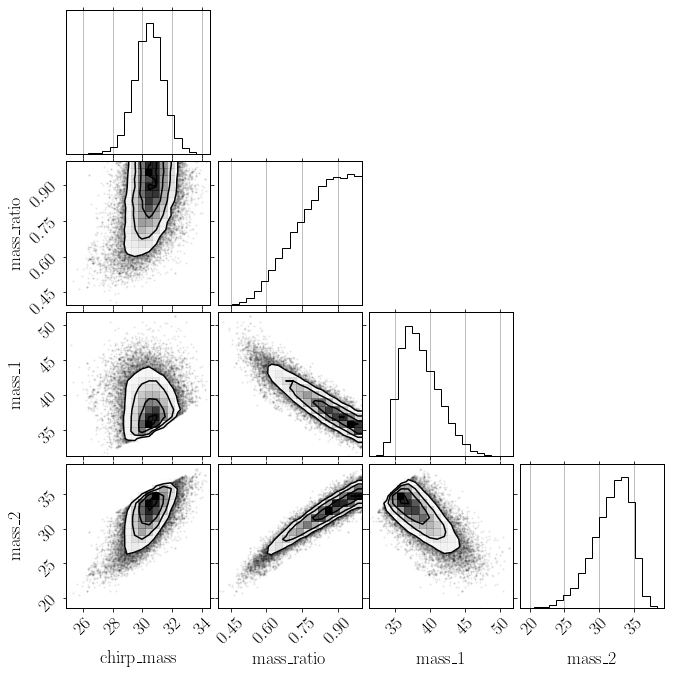

In [3]:
%matplotlib inline 

parameters = ["chirp_mass", "mass_ratio", "mass_1", "mass_2"]
fig = corner.corner(np.column_stack([data[param] for param in parameters]), labels=parameters)
plt.show()

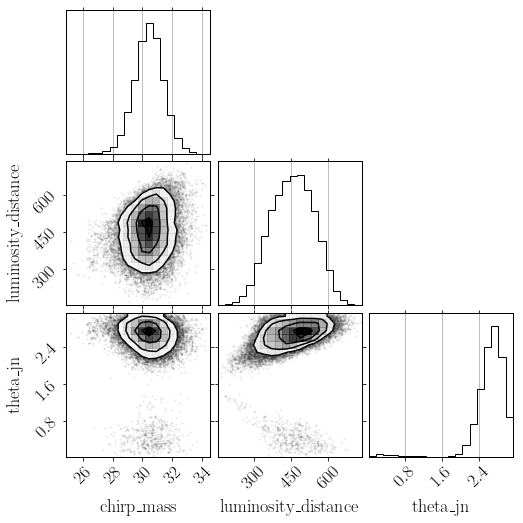

In [4]:
%matplotlib inline 
parameters = ["chirp_mass", "luminosity_distance", "theta_jn"]
fig = corner.corner(np.column_stack([data[param] for param in parameters]), labels=parameters)
plt.show()

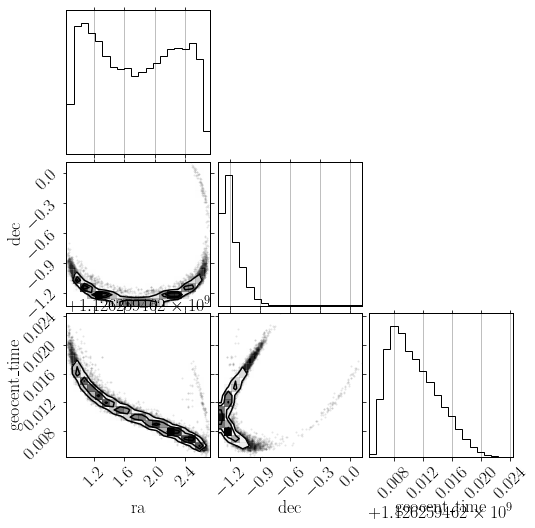

In [5]:
%matplotlib inline 
parameters = ["ra", "dec", "geocent_time"]
fig = corner.corner(np.column_stack([data[param] for param in parameters]), labels=parameters)
plt.show()

In [6]:
def ci_using_symmetric_quantiles(samples, ci_level=90):
    delta = 1/2 - ci_level / 200
    lower, upper = np.quantile(samples, [delta, 1 - delta])
    return lower, upper

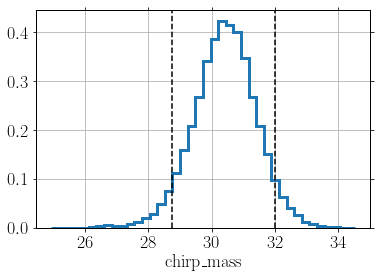

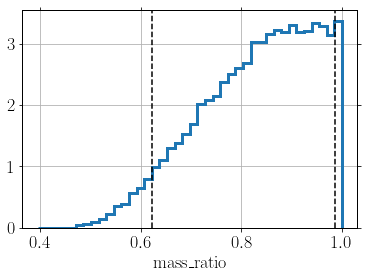

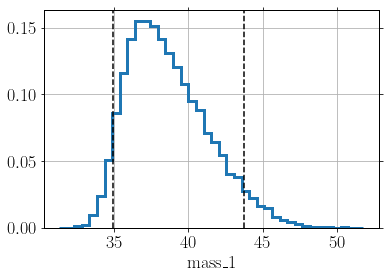

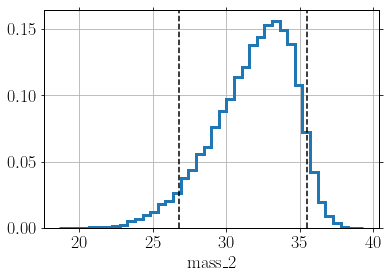

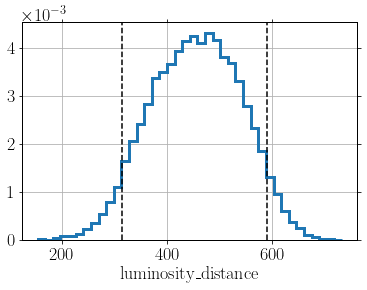

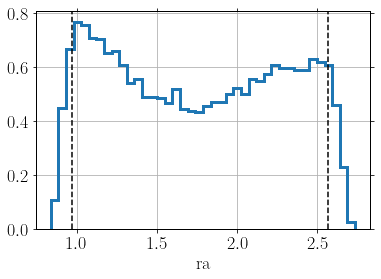

In [7]:
for parameter in ["chirp_mass", "mass_ratio", "mass_1", "mass_2",
                  "luminosity_distance", "ra"]:
    plt.hist(data[parameter], density=True, histtype="step", bins=40, lw=3)
    plt.xlabel(parameter)
    lower_ci, upper_ci = ci_using_symmetric_quantiles(data[parameter])
    plt.axvline(lower_ci, ls="--", color="k")
    plt.axvline(upper_ci, ls="--", color="k")
    plt.show()
    